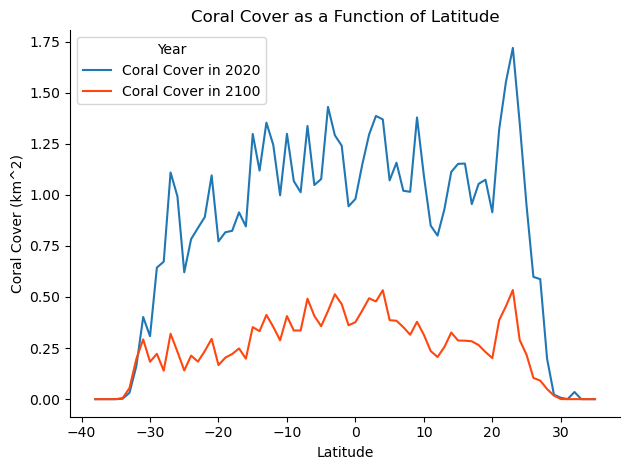

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')

# Display a summary
data

# Create a new column with the floored latitude (removing decimals)
data['latitude_grouped'] = np.floor(data['latitude']).astype(int)

# Group by the new latitude column and calculate the mean for coral cover columns
mean_coral_cover = data.groupby('latitude_grouped', as_index=False).mean()

#Melt data into coral_melted long format for seaborn
mean_melt_coral=mean_coral_cover.melt(id_vars='latitude', value_vars=['coral_cover_2020','coral_cover_2100'], var_name='year', value_name='coral_cover')

# Create a new column with the floored latitude (removing decimals)
mean_melt_coral['latitude_grouped']= np.floor(mean_melt_coral['latitude']).astype(int)

#make year 2020 and 2100 category to use for hue
mean_melt_coral['year']=mean_melt_coral['year'].astype('category')

#create line plot with seaborn
custom_colors = ["#1f77b4", "#ff460e"]
dx =sns.lineplot(data=mean_melt_coral, x='latitude_grouped', y='coral_cover', hue= 'year', marker='none', palette=custom_colors)


#customize  the plot
plt.xlabel("Latitude")
plt.ylabel('Coral Cover (km^2)')
plt.title('Coral Cover as a Function of Latitude')
plt.grid(False)
plt.tight_layout()
handles, _ = dx.get_legend_handles_labels()
plt.legend(handles=handles, title='Year', labels=['Coral Cover in 2020', 'Coral Cover in 2100'])
sns.despine() # Remove top and right axis spines

# #show plot
# plt.show()

#Save the figure
save_path = 'C:/Users/creicjs/Documents/UH/MBIO 691I/691I-final-project/691I-final-project/Figures/Figure 1.pdf'
plt.savefig(save_path, dpi=300, bbox_inches='tight')

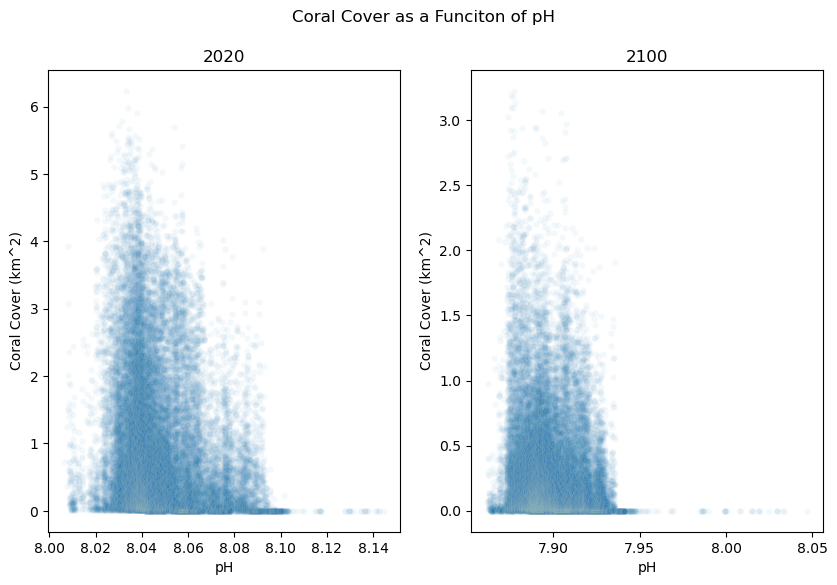

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')


# Group by both pH and year to calculate the mean coral cover for each combination
mean_coral_cover_2020 = data.groupby(['pH_2020'])['coral_cover_2020'].mean().reset_index()

mean_cover_2020 = mean_coral_cover_2020.groupby('pH_2020')['coral_cover_2020'].mean().reset_index()



mean_coral_cover_2100 = data.groupby(['pH_2100'])['coral_cover_2100'].mean().reset_index()

# #plot
fig,axes =plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Coral Cover as a Funciton of pH')

#2020
sns.scatterplot(ax= axes[0], data=mean_cover_2020, x='pH_2020',y='coral_cover_2020',alpha=0.05, s=20)

axes[0].set_title('2020')
axes[0].set_xlabel("pH")
axes[0].set_ylabel('Coral Cover (km^2)')
#2100
sns.scatterplot(ax= axes[1], data=mean_coral_cover_2100, x='pH_2100',y='coral_cover_2100',alpha=0.05, s=20)

axes[1].set_title('2100')
axes[1].set_xlabel("pH")
axes[1].set_ylabel('Coral Cover (km^2)')

#Save the figure
save_path = 'C:/Users/creicjs/Documents/UH/MBIO 691I/691I-final-project/691I-final-project/Figures/Figure 2.pdf'
plt.savefig(save_path, dpi=300, bbox_inches='tight')

#Got lost and confused with getting means and melting the data. I left this code to show my attempt

# # Display a summary
# test = data.reset_index()
# test.columns = test.columns.str.replace('_', '')
# long = pd.wide_to_long(test, stubnames=['pH', 'coralcover'], i='lonlat', j='year')
# long

 
# #plot
# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
# ax1 = sns.scatterplot(data=long, x='pH',y='coralcover', hue= 'year')


# #Group by pH and calculate the mean coral cover
# mean_coral_cover = long.groupby('pH','year')['coralcover'].mean().reset_index()

# mean_coral_cover

# #Reshape using melt, melting around pH values
# data_melt_pH= pd.melt(data, id_vars=['coral_cover_2020','coral_cover_2100'], value_vars=['pH_2020','pH_2100'], var_name='year', value_name='pH')

# #Reshape again so that you can have two line for 2020 and 2100
# data_melt_pH_year=pd.melt(data_melt_pH, id_vars=['pH'], value_vars= ['coral_cover_2020', 'coral_cover_2100'], var_name='Year', value_name='Coral Cover')

# #
# temp=data.reset_index()
# test=pd.wide_to_long(temp, stubnames='pH', i='lon_lat', j='year' )
# test.head()
# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
# # ax1.scatter(data.pH_2020,data.coral_cover_2020, alpha=0.05, s=5)
# # plt.show()

# #Plot using sns.lineplot
# plt.figure(figsize=(10, 6))
# ax = sns.lineplot(data=data_melt_pH_year, x='pH', y='Coral Cover', call='year')

# #Edit plot display
# plt.title('Coral Cover vs pH')
# plt.xlabel('pH')
# plt.ylabel('Coral Cover (%)')
# plt.legend(title='Year')
# plt.show()

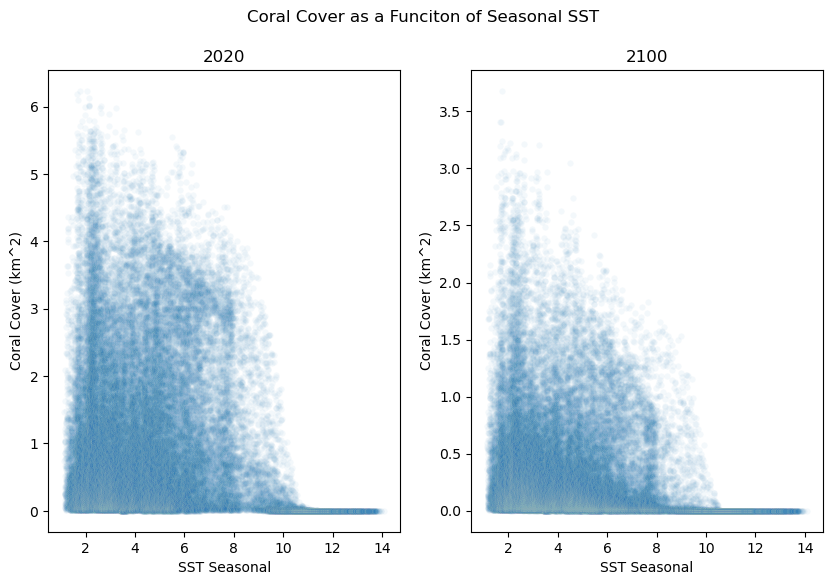

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')

# Display a summary
test = data.reset_index()
test.columns = test.columns.str.replace('_', '')
long = pd.wide_to_long(test, stubnames=['pH', 'coralcover'], i='lonlat', j='year')
long

# Group by SSTseasonal and calculate the mean coral cover for 2020
SST_seasonal_mean_2020 = data.groupby(['SST_seasonal'])['coral_cover_2020',].mean().reset_index()

# Group by SSTseasonal and calculate the mean coral cover for 2100
SST_seasonal_mean_2100 = data.groupby(['SST_seasonal'])['coral_cover_2100',].mean().reset_index()

# #plot
fig,axes =plt.subplots(1,2,figsize=(10,6))
fig.suptitle('Coral Cover as a Funciton of Seasonal SST')

#2020
sns.scatterplot(ax= axes[0], data=SST_seasonal_mean_2020, x='SST_seasonal',y='coral_cover_2020',alpha=0.05, s=20)

axes[0].set_title('2020')
axes[0].set_xlabel("SST Seasonal")
axes[0].set_ylabel('Coral Cover (km^2)')
#2100
sns.scatterplot(ax= axes[1], data=SST_seasonal_mean_2100, x='SST_seasonal',y='coral_cover_2100',alpha=0.05, s=20)

axes[1].set_title('2100')
axes[1].set_xlabel("SST Seasonal")
axes[1].set_ylabel('Coral Cover (km^2)')

#Save the figure
save_path = 'C:/Users/creicjs/Documents/UH/MBIO 691I/691I-final-project/691I-final-project/Figures/Figure 3.pdf'
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# I tried to make a heat map but got lost and confused. I left code in to show my attempt.
# #Extract columns
# SST = data['SST_seasonal']
# cover_2020 = data['coral_cover_2020']

# # # Create 2D histogram
# # plt.hist2d(SST, cover_2020, bins=25, cmap='viridis')
# # plt.colorbar(label='Density')
# # plt.xlabel('SST')
# # plt.ylabel('Coral Cover')
# # plt.title('Heat Map of SST vs Coral Cover')
# # plt.show()

# # #plot
# fig,(ax1, ax2) =plt.subplots(1,2,figsize=(10,6))
# fig.suptitle('Coral Cover as a Funciton of SST seasonality')

# sns.scatterplot(ax= ax1, data=SST_seasonal_mean_2020, x='SST_seasonal',y='coral_cover_2020')

# ax1.set_title('2020')
# ax1.set_xlabel("SST Seasonal")
# ax1.set_ylabel('Coral Cover (km^2)')

# # #Plot hexbin
# # heatmap = ax2.hexbin(SST, cover_2020, gridsize=50, cmap='viridis')
# # plt.colorbar(heatmap, ax=ax2, label='Density')
# # ax2.set.xlabel('SST')
# # ax2.set.ylabel('Coral Cover')
# # ax2.set.title('Hexbin Heat Map of SST vs Coral Cover')
# # plt.show()